## Climate-DT Healpix data

This notebook is a simple example of how to use the Healpix data from the Climate-DT dataset. The Climate-DT dataset is a dataset of climate data that is stored in GRIB2 WMO standard format and served via Polytope from the Destination Earth data store. The Healpix grid is a way of storing data on the sphere that is used in astronomy and other fields, where the grid of pixels on the sphere is spread equally on the sphere. 

The Climate-DT dataset contains data on temperature, precipitation, and other climate variables. 
In this notebook, we will show how to read the data from the Climate-DT dataset, interpolate it to a Regular Lat-Lon grid, plot it on a map or transform it to NetCDF format.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [ ]:
import earthkit.data
import earthkit.plots
import earthkit.regrid


request = {
    'activity': 'ScenarioMIP',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20200102',
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '134/165/166',
    'realization': '1',
    'resolution': 'standard',
    'stream': 'clte',
    'time': '0100', # '0100/0200/0300/0400/0500/0600'
    'type': 'fc'
}

# data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

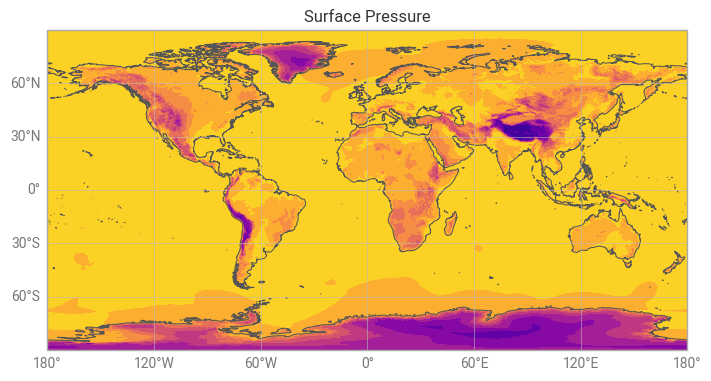

In [2]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.plot(
    data[0]
)

chart.title("Surface Pressure")
chart.coastlines()
chart.gridlines()
chart.show()

In [3]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,an,None,healpix
1,ecmf,10u,heightAboveGround,10,20200102,100,0,an,None,healpix
2,ecmf,10v,heightAboveGround,10,20200102,100,0,an,None,healpix


In [4]:
# interpolate to a 1x1 degree lat-lon regular grid (in memory)
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")

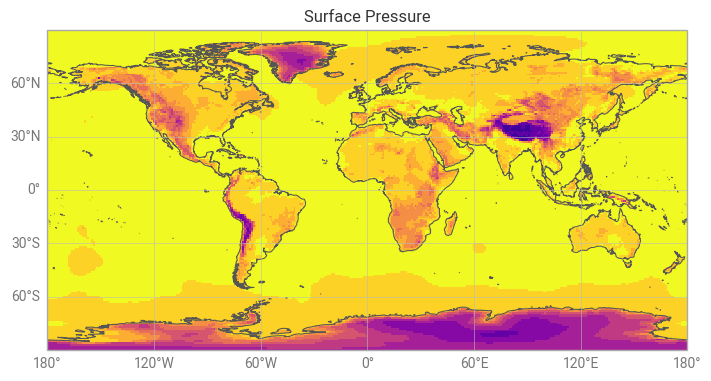

In [5]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.plot(
    data_latlon[0]
)

chart.title("Surface Pressure")
chart.coastlines()
chart.gridlines()
chart.show()

In [6]:
data_latlon.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,an,None,regular_ll
1,ecmf,10u,heightAboveGround,10,20200102,100,0,an,None,regular_ll
2,ecmf,10v,heightAboveGround,10,20200102,100,0,an,None,regular_ll


In [57]:
data_latlon.save("data_latlon.nc")